In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\4-gauss\4-gauss_NW_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,-0.360190,0.16134,0.067351,3.53370,0.469590,0.67908,3.43440,2.79240,2.77630,1.69910,3.815600,1.746400
1,-0.098505,-0.17857,2.062800,2.92160,0.424720,NaN,1.68020,1.38880,3.21670,2.92360,NaN,0.641450
2,-0.169460,0.50153,2.470900,3.06500,1.567600,1.48240,0.92160,2.64240,1.51870,2.53180,2.432800,1.876800
3,-0.136050,0.47279,0.588090,1.95630,2.787000,2.59570,2.89330,1.53750,0.99942,NaN,NaN,3.265800
4,0.098830,0.23418,0.429700,1.63120,3.554100,2.27110,0.37425,2.17860,1.31400,1.06320,1.026900,2.188400
...,...,...,...,...,...,...,...,...,...,...,...,...
795,3.769000,-2.68670,1.576000,0.55612,0.070769,2.07470,NaN,3.22290,3.49330,1.32550,3.231100,0.005387
796,3.466600,-4.03460,3.100400,1.34610,1.377300,2.28870,0.39613,2.39610,2.46350,1.66750,2.461700,1.226700
797,NaN,-2.38430,2.031000,2.26460,NaN,1.53700,1.22560,0.74027,2.49540,1.34330,1.622500,1.585300
798,3.441400,-5.21630,1.577000,1.84400,1.098700,3.42430,0.81081,3.72700,1.18790,0.95112,1.884500,1.143700


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	105
float64		column 2	65
float64		column 3	92
float64		column 4	92
float64		column 5	79
float64		column 6	66
float64		column 7	78
float64		column 8	65
float64		column 9	65
float64		column 10	78
float64		column 11	66
float64		column 12	91


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
count,695.000000,735.000000,708.000000,708.000000,721.000000,734.000000,722.000000,735.000000,735.000000,722.000000,734.000000,709.000000
mean,1.503405,1.337135,1.996493,1.935739,2.008374,1.992574,1.983515,2.012346,1.969260,1.976516,1.976745,1.965658
std,2.648524,3.559176,1.111370,1.121397,1.147168,1.115003,1.142450,1.118344,1.109976,1.123735,1.167640,1.093355
min,-4.692600,-6.341500,0.023586,0.002628,0.021103,0.001674,0.011923,0.004193,0.009369,0.002484,0.002000,0.000288
25%,-0.340260,-0.541520,1.078225,0.987387,1.035400,1.059100,1.015825,1.008350,1.068550,1.064075,0.930168,1.051500
50%,0.830950,0.745960,1.983000,1.906800,2.054700,1.994200,2.002150,2.029800,1.919900,1.979550,1.991300,1.956100
75%,3.861450,4.498250,2.874325,2.912875,2.972800,2.926700,2.960575,2.903800,2.925050,2.921150,3.001075,2.812800
max,6.982200,8.018800,3.992600,3.997300,3.998500,3.995100,3.999900,3.998200,3.988300,3.998800,3.990900,3.998300


<AxesSubplot:>

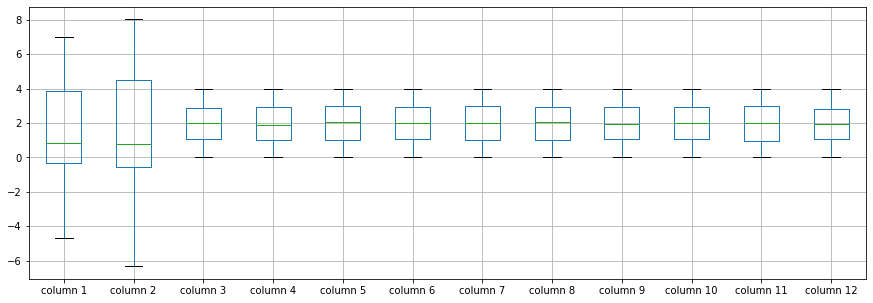

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     1.503405
column 2     1.337135
column 3     1.996493
column 4     1.935739
column 5     2.008374
column 6     1.992574
column 7     1.983515
column 8     2.012346
column 9     1.969260
column 10    1.976516
column 11    1.976745
column 12    1.965658
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
column 1,1.000000,-0.404009,-0.037188,0.045194,0.017693,0.071658,-0.012898,0.057664,-0.009106,0.009740,0.025387,0.058467
column 2,-0.404009,1.000000,0.016502,-0.070323,-0.019851,-0.036634,0.029105,-0.033762,-0.003743,-0.071720,-0.101586,0.010509
column 3,-0.037188,0.016502,1.000000,-0.056236,0.098048,-0.006575,0.040681,-0.009655,-0.004116,0.021244,-0.039546,-0.009598
column 4,0.045194,-0.070323,-0.056236,1.000000,0.012154,0.002352,0.040969,0.052554,-0.003015,0.039075,0.024652,0.012566
column 5,0.017693,-0.019851,0.098048,0.012154,1.000000,0.029744,0.051981,-0.020282,-0.018398,-0.009461,-0.023349,0.000048
column 6,0.071658,-0.036634,-0.006575,0.002352,0.029744,1.000000,-0.045986,0.046004,0.009794,0.008860,-0.011355,0.024841
column 7,-0.012898,0.029105,0.040681,0.040969,0.051981,-0.045986,1.000000,-0.049465,0.002153,-0.032720,-0.014656,-0.001375
column 8,0.057664,-0.033762,-0.009655,0.052554,-0.020282,0.046004,-0.049465,1.000000,-0.046348,-0.075489,0.006664,-0.066835
column 9,-0.009106,-0.003743,-0.004116,-0.003015,-0.018398,0.009794,0.002153,-0.046348,1.000000,0.053672,-0.025924,-0.035655
column 10,0.009740,-0.071720,0.021244,0.039075,-0.009461,0.008860,-0.032720,-0.075489,0.053672,1.000000,-0.097159,0.034337


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [12,12+59,12+59+59,12+59+59+59,12+59+59,12+59,12], vae_layer = False, seed = 60)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [12]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 26.487662506103515
Epoch: 1 , loss: 26.339467124938963
Epoch: 2 , loss: 26.173501472473145
Epoch: 3 , loss: 25.817402839660645
Epoch: 4 , loss: 24.133322715759277
Epoch: 5 , loss: 20.780740661621095
Epoch: 6 , loss: 20.101012268066405
Epoch: 7 , loss: 19.72750457763672
Epoch: 8 , loss: 19.524260330200196
Epoch: 9 , loss: 19.113238525390624
Epoch: 10 , loss: 18.992900466918947
Epoch: 11 , loss: 18.64940059661865
Epoch: 12 , loss: 18.5635298538208
Epoch: 13 , loss: 18.383090744018556
Epoch: 14 , loss: 18.291375522613524
Epoch: 15 , loss: 18.253722457885743
Epoch: 16 , loss: 18.283203315734863
Epoch: 17 , loss: 17.9971710395813
Epoch: 18 , loss: 17.911230030059816
Epoch: 19 , loss: 17.862574214935304
Epoch: 20 , loss: 17.6539599609375
Epoch: 21 , loss: 17.785338668823243
Epoch: 22 , loss: 17.706298027038574
Epoch: 23 , loss: 17.697625064849852
Epoch: 24 , loss: 17.615675945281982
Epoch: 25 , loss: 17.5417

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(800, 12)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     0.463080
column 2     0.042845
column 3     3.034900
column 4     0.379700
column 5     2.475300
column 6     2.162000
column 7     1.670000
column 8     0.755510
column 9     2.032100
column 10    3.847400
column 11    0.230250
column 12    0.359250
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\4-gauss.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.000000
1,0.00000,0.0,0.0,0.000000,0.000000,-0.540703,0.000000,0.0,0.0,0.00000,-0.129635,0.000000
2,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.000000
3,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,-2.28751,0.702186,0.000000
4,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.165773,0.0,0.0,0.00000,0.000000,0.000000
796,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.000000
797,-2.06823,0.0,0.0,0.000000,-1.478982,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.000000
798,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(65.5754333422771, 248.22200824735242)

In [17]:
NRMS=numerator/denominator
NRMS


0.26418057691698066

In [18]:
new_df.iloc[66,:]

column 1     0.207620
column 2    -0.550520
column 3     2.339900
column 4     1.794800
column 5     1.401300
column 6     2.765800
column 7     1.304100
column 8     1.249300
column 9     1.077859
column 10    1.284300
column 11    1.879400
column 12    0.575240
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,-0.360190,0.16134,0.067351,3.533700,0.469590,0.679080,3.434400,2.79240,2.77630,1.69910,3.815600,1.746400
1,-0.098505,-0.17857,2.062800,2.921600,0.424720,0.637797,1.680200,1.38880,3.21670,2.92360,0.643275,0.641450
2,-0.169460,0.50153,2.470900,3.065000,1.567600,1.482400,0.921600,2.64240,1.51870,2.53180,2.432800,1.876800
3,-0.136050,0.47279,0.588090,1.956300,2.787000,2.595700,2.893300,1.53750,0.99942,1.37179,1.320436,3.265800
4,0.098830,0.23418,0.429700,1.631200,3.554100,2.271100,0.374250,2.17860,1.31400,1.06320,1.026900,2.188400
...,...,...,...,...,...,...,...,...,...,...,...,...
795,3.769000,-2.68670,1.576000,0.556120,0.070769,2.074700,0.968813,3.22290,3.49330,1.32550,3.231100,0.005387
796,3.466600,-4.03460,3.100400,1.346100,1.377300,2.288700,0.396130,2.39610,2.46350,1.66750,2.461700,1.226700
797,1.276570,-2.38430,2.031000,2.264600,1.862218,1.537000,1.225600,0.74027,2.49540,1.34330,1.622500,1.585300
798,3.441400,-5.21630,1.577000,1.844000,1.098700,3.424300,0.810810,3.72700,1.18790,0.95112,1.884500,1.143700


In [20]:
imputations[-1].to_excel("4-gauss_NW_10(imp).xlsx", index=False, header=False)